# 1 Importing Libraries and data

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# importing dataframe
path = r'/Users/sudip/Desktop/DATA ANALYST/Projects/Project 4 Python/Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'full_instacart_data.pkl'))

In [4]:
df.shape

(32404859, 35)

In [5]:
# making prices mor than 100 as missing since they don’t make sense in terms of the other values in the column
df.loc[df['prices']>100, 'prices'] = np.nan

In [6]:
df['prices'].max()

25.0

In [7]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,...,order_frequency_flag,first_name,last_name,Gender,state,Age,date_joined,no_of_dependants,marital_status,income
0,2539329,1,prior,1,2,8,NaN,True,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,False,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,False,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,False,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,False,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 2. Creating Charts

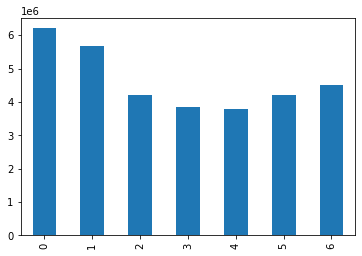

In [9]:
# Create a bar chart sorted on index (0-6)
bar = df['orders_day_of_the_week'].value_counts().sort_index().plot.bar()

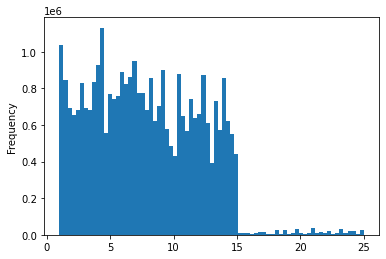

In [10]:
# Creating histogram of prices
hist = df['prices'].plot.hist(bins=75)

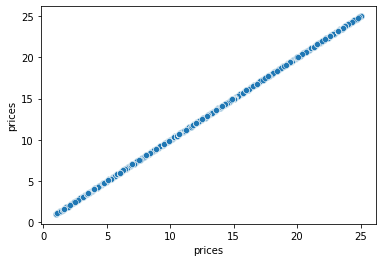

In [11]:
# creating scatterplot
scatter = sns.scatterplot(x= 'prices', y = 'prices', data = df)

# Creating line-chart with subset

In [13]:
# sampling data in a 70/30 split
np.random.seed(4)
# create a list holding True/False values to the test np.random.rand() <=0.7
dev = np.random.rand(len(df)) <= 0.7

In [15]:
# Store 70% of sample in the dataframe big
big = df[dev]

In [16]:
# Store 30% of sample in the dataframe small
small = df[~dev]

In [17]:
len(df)

32404859

In [18]:
len(big) + len(small)

32404859

In [19]:
df_small = small[['orders_day_of_the_week', 'prices']]

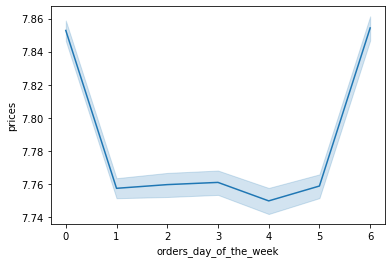

In [20]:
# creating line chart on 30% of df sample 
line = sns.lineplot(data = df_small, x = 'orders_day_of_the_week',y = 'prices')

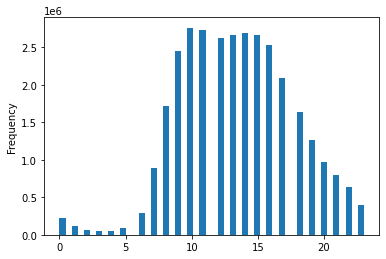

In [22]:
# Creating a histogram of the “order_hour_of_day” column
hist2 = df['order_hour_of_day'].plot.hist(bins = 50)

# Most of the Instacart orders are placed at 10 and 11AM. The order placements are steady from 12 PM to 3 PM and starting to drop off from 4 PM. Least number of orders placed between 12 AM to 5 AM.

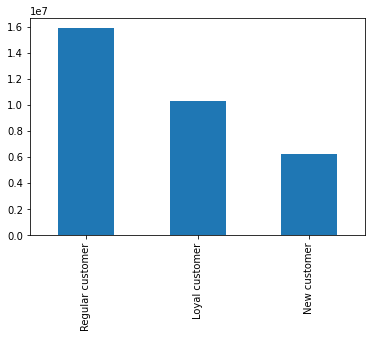

In [23]:
# creating bar-chart from “loyalty_flag” column
bar2 = df['loyalty_flag'].value_counts().plot.bar()

In [24]:
# Checking whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 
# Creating new data frame from 30% sample subset with just the columns needed for the line chart
df_small2 = small[['order_hour_of_day', 'prices']]

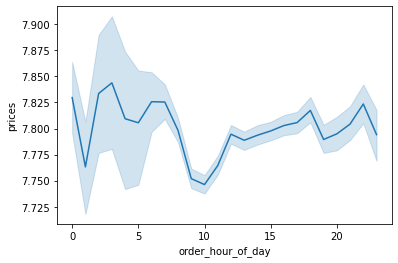

In [25]:
# creating line chart on 30% of df sample
line2 = sns.lineplot(data = df_small2, x= 'order_hour_of_day', y = 'prices')

In [26]:
#determining whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents
# Creating new dataframe from 30% sample subset with just the columns needed for the line chart
df_small3 = small[['Age', 'no_of_dependants']]

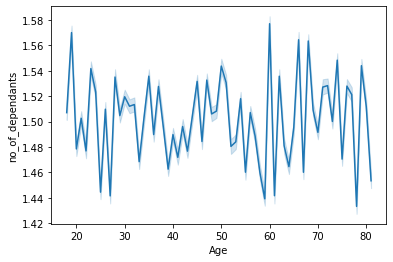

In [29]:
# creating line chart on 30% of df sample
line3 = sns.lineplot(data = df_small3, x = 'Age', y = 'no_of_dependants')

# The above line-chart shows that there is no clear connection between age and number of dependents for Instacart customers.

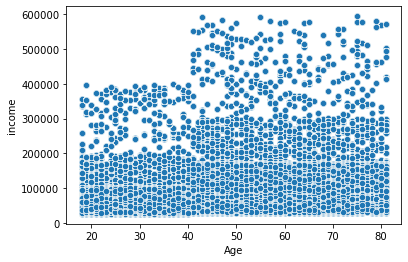

In [30]:
# exploring whether there’s a connection between age and spending power (income).
scatter2 = sns.scatterplot(x = 'Age', y = 'income', data = df)

The scatterplot shows the relationship between between age and income of instacart customers. Some facts are explitcit from the plot :
1. Majority of the customers with in the age group of 20 to 40 are earning USD 200,000.00
2. Majority of Customers above 40 years are earning USD 300,000.00 and income rises up to 600,000 USD.
3. So, from above sactterplot, it can be concluded that instacart customers above 40 years have ability to spend more base on their higher income.

# Exporting visualizations

In [31]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

In [32]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

In [33]:
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_prices.png'))

In [34]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_dow_prices.png'))

In [35]:
hist2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_of_day.png'))

In [36]:
bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

In [37]:
line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_prices.png'))

In [38]:
line3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants.png'))

In [39]:
scatter2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))

In [1]:
#Exporting the dataframe
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'full_instacart_data.pkl'))

NameError: name 'df' is not defined